In [ ]:

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
# red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')


# from visualization_utils import plot_error_distribution


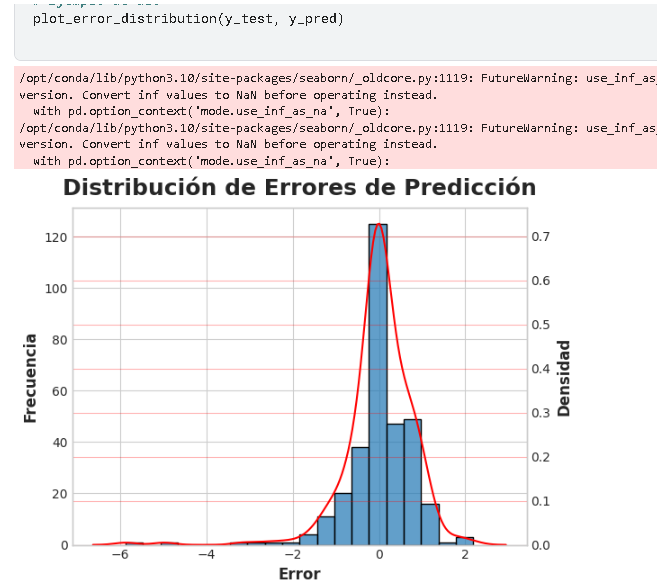

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_error_distribution(y_true, y_pred):
    """
    Esta función toma los valores verdaderos y las predicciones, calcula el error,
    y muestra un gráfico con un histograma de errores y una curva KDE de la densidad.
    
    :param y_true: Array de valores verdaderos.
    :param y_pred: Array de valores predichos.
    """
    # Calcular errores
    errors = y_true - y_pred.flatten()

    # Crear la figura y el eje principal
    fig, ax1 = plt.subplots()

    # Crear el histograma en el eje principal
    sns.histplot(errors, bins=20, edgecolor='k', alpha=0.7, ax=ax1)
    ax1.set_xlabel('Error')
    ax1.set_ylabel('Frecuencia')
    ax1.set_title('Distribución de Errores de Predicción')

    # Crear un segundo eje que comparte el mismo eje x
    ax2 = ax1.twinx()

    # Crear el KDE en el segundo eje
    sns.kdeplot(errors, ax=ax2, color='r')
    ax2.set_ylabel('Densidad')

    # Modificar la grilla del eje y de la derecha
    ax2.grid(True, which='both', axis='y', color='r', alpha=0.3)

    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso
# plot_error_distribution(y_test, y_pred)


La densidad en el gráfico de KDE (Kernel Density Estimation) representa una estimación de la función de densidad de probabilidad de los datos. En términos simples, la curva de KDE te muestra una versión suavizada del histograma, lo que te ayuda a ver la forma de la distribución de los datos de errores.

### Interpretación de la Densidad:

1. **Altura de la Curva de KDE**:
   - La altura de la curva de KDE en cualquier punto indica la densidad relativa de los datos en esa región. Un pico alto indica que muchos datos (errores) se agrupan cerca de ese valor.

2. **Área bajo la Curva**:
   - El área total bajo la curva de KDE es igual a 1, lo que representa la probabilidad total de todos los datos. Esto significa que la integral de la densidad sobre todo el rango de datos es 1.

3. **Comparación con el Histograma**:
   - Aunque el histograma muestra el recuento de errores en cada bin, la curva de KDE muestra la densidad de estos errores. Por ejemplo, un bin alto en el histograma y un pico alto en la KDE indican una alta frecuencia de errores en esa región.

4. **Análisis de la Forma de la Distribución**:
   - La KDE ayuda a identificar la forma de la distribución de los errores (si es unimodal, bimodal, etc.). En tu gráfico, puedes ver un único pico cerca de 0, lo que sugiere que la mayoría de los errores están cerca de 0.

### Ejemplo Específico:

- **Pico alrededor de 0**: La mayor densidad de errores se encuentra cerca de 0, lo que indica que la mayoría de las predicciones están bastante cerca de los valores reales.
- **Colas en ambos extremos**: Las colas a ambos lados del pico muestran que hay algunos errores grandes (tanto negativos como positivos), pero su densidad es baja.

En resumen, la curva de KDE proporciona una visión más suave y continua de la distribución de errores en comparación con el histograma, facilitando la identificación de patrones y tendencias en los datos de errores.

# Mas interpretacion de la ditstribucion de errores : 

Para interpretar el histograma y el gráfico KDE en el contexto de los errores de predicción:

### Frecuencia (Eje Y del Histograma)

1. **Frecuencia**:
   - La frecuencia en el eje y del histograma indica el número de ocurrencias de los errores dentro de cada bin. Por ejemplo, si un bin tiene una altura de 20, significa que 20 errores caen dentro del rango de valores que representa ese bin.
   - Esto te da una idea de cómo se distribuyen los errores en términos de conteo absoluto.

### Error (Eje X)

2. **Error**:
   - El eje x representa los valores de error, que son la diferencia entre los valores reales (`y_test`) y los valores predichos (`y_pred`). 
   - Valores negativos de error indican que la predicción fue mayor que el valor real.
   - Valores positivos de error indican que la predicción fue menor que el valor real.
   - Un error de 0 significa que la predicción fue exacta.

### Relación entre Frecuencia y Error

- **Histograma**:
  - Cada barra en el histograma muestra cuántos errores caen dentro de un rango específico de valores de error. 
  - Por ejemplo, si el bin centrado en 0 tiene una altura de 120, eso significa que 120 errores están cerca de 0, lo que indica que las predicciones fueron bastante precisas para esos casos.

- **Curva de KDE**:
  - La curva de KDE proporciona una estimación suave de la densidad de probabilidad de los errores. Un pico alto en la KDE cerca de 0 indica que muchos errores están cerca de 0, lo que es consistente con el histograma.

### Interpretación Específica del Gráfico:

1. **Pico en Cero**:
   - El gráfico muestra un alto pico en 0 en ambos el histograma y la curva de KDE. Esto significa que la mayoría de los errores son pequeños y las predicciones son generalmente precisas.
   
2. **Distribución de Errores**:
   - La mayoría de los errores están concentrados alrededor de 0, lo que indica que el modelo de predicción es bastante preciso en general.
   - La altura de la barra del histograma en el centro indica la frecuencia con la que los errores están cerca de 0.

3. **Colas a la Izquierda y Derecha**:
   - Las colas en ambos lados del histograma y la curva KDE muestran la presencia de algunos errores más grandes. Sin embargo, su frecuencia es menor, como se muestra por la menor altura de las barras del histograma y la baja densidad en la curva KDE en esas regiones.

En resumen, el histograma te proporciona una visualización del recuento absoluto de errores en cada rango, mientras que la curva de KDE te da una visión suavizada de la distribución de los errores. Ambos gráficos juntos te permiten entender mejor la precisión de tus predicciones y la distribución de los errores.

# Evaluación en regresion (prediccion de valores numericos)

 evalaucion media absoluta, y precicion relativa segun mae y rango de valores

In [ ]:
from sklearn.metrics import mean_absolute_error

def reg_evaluation(model, X_test, y_test, verbose=False):
    """
    Evalúa el rendimiento de un modelo de regresión en términos de MAE y precisión relativa.

    Parámetros:
    model: El modelo de regresión entrenado.
    X_test: Características del conjunto de prueba.
    y_test: Valores verdaderos del conjunto de prueba.
    verbose: Si es True, retorna las predicciones y las métricas de evaluación.

    Retorna:
    Opcionalmente, las predicciones, el MAE en porcentaje y el MAE absoluto si verbose=True.
    """
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular MAE
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE (Error Absoluto Medio) en el conjunto de prueba: \n--> {mae:.4f}\n')

    # Calcular el rango de los valores objetivo
    y_range = y_test.max() - y_test.min()

    # Calcular el MAE en porcentaje
    mae_percentage = (mae / y_range) * 100
    print(f'Precisión relativa del modelo según el MAE y el rango de valores de la variable objetivo: \n-> {mae_percentage:.2f}%')

    if verbose:
        return y_pred, mae_percentage, mae

# ej de uso
#reg_evaluation(model, X_test,y_test)



retorno de ejmeplo

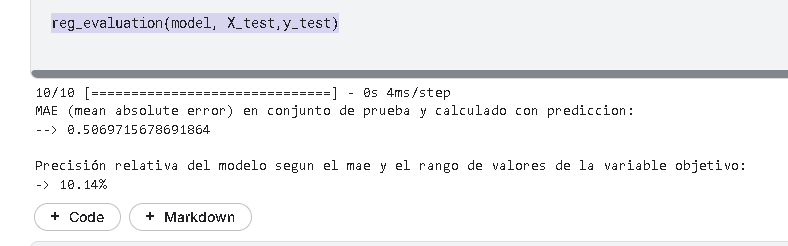

# -----------------

# Juntamos todas las metricas utiles en regresion en una funcion

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def more_reg_eval(y_test, y_pred):
    """
    Calcula y muestra métricas de evaluación para un modelo de regresión.

    Parámetros:
    y_test (array-like): Valores reales del conjunto de prueba.
    y_pred (array-like): Predicciones realizadas por el modelo sobre el conjunto de prueba.

    Métricas Calculadas:
    - MAE (Error Absoluto Medio): Mide el promedio de los errores absolutos entre las predicciones y los valores reales.
    - MSE (Error Cuadrático Medio): Calcula el promedio de los cuadrados de los errores.
    - RMSE (Raíz del Error Cuadrático Medio): Proporciona una medida del error en las mismas unidades que los datos.
    - R^2 (Coeficiente de Determinación): Mide la proporción de la varianza en la variable dependiente que es explicada por el modelo.

    Resultados:
    Imprime las métricas MAE, MSE, RMSE y R^2 en la consola.
    """
    # Calcular MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calcular MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Calcular RMSE
    rmse = np.sqrt(mse)
    
    # Calcular R^2
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir resultados
    # print(f'\nMAE (Error Absoluto Medio): {mae}')
    print(f'\nMSE (Error Cuadrático Medio): {mse}')
    print(f'\nRMSE (Raíz del Error Cuadrático Medio): {rmse}')
    print(f'\nR^2 (Coeficiente de Determinación): {r2}')


def complete_reg_eval(model, X_test, y_test, y_pred):
    """
    Evalúa y presenta el rendimiento del modelo de regresión mediante diferentes métricas y visualizaciones.

    Parámetros:
    model: El modelo de regresión que se está evaluando.
    X_test (array-like): Datos de entrada del conjunto de prueba.
    y_test (array-like): Valores reales del conjunto de prueba.
    y_pred (array-like): Predicciones realizadas por el modelo sobre el conjunto de prueba.

    Funcionalidad:
    - Visualiza la distribución de errores mediante un gráfico.
    - Evalúa el modelo con métricas de rendimiento como MAE, MSE, RMSE y R^2.
    - Calcula y muestra métricas adicionales de evaluación del modelo.

    Uso:
    Llama a esta función con el modelo, el conjunto de prueba y las predicciones para obtener un análisis completo del rendimiento.
    """
    # Visualizar la distribución de errores
    plot_error_distribution(y_test, y_pred)
    
    # Evaluar el modelo con métricas de rendimiento
    reg_evaluation(model, X_test, y_test)
    
    # Calcular y mostrar métricas adicionales
    more_reg_eval(y_test, y_pred)

    
#complete_reg_eval(model,X_test,y_test, y_pred)

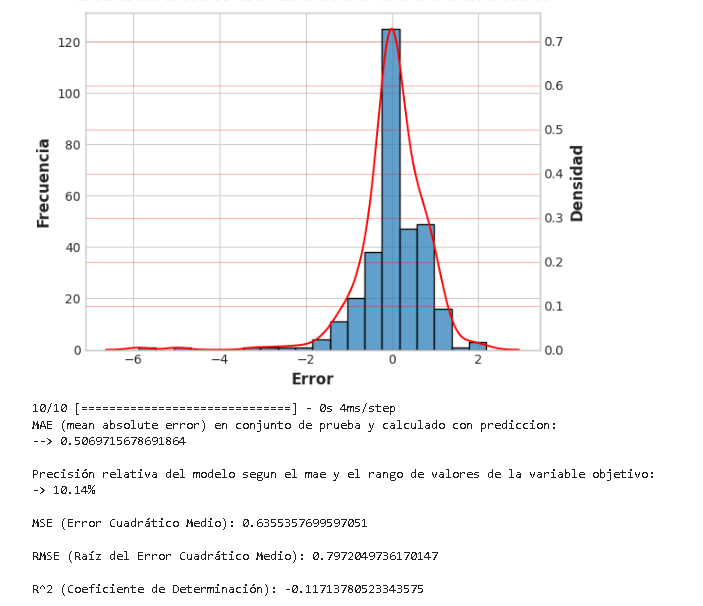

# Interpretacion:

### interpretacion de estas nuevas  metricas aparte de las de MAE

Vamos a interpretar tanto el gráfico de distribución de errores como las métricas presentadas para el modelo de regresión de Deep Learning.

### Gráfico de Distribución de Errores

1. **Histograma de Errores**:
   - El eje x representa los errores de predicción, es decir, la diferencia entre los valores reales (`y_test`) y los valores predichos (`y_pred`).
   - El eje y a la izquierda muestra la frecuencia, que es el número de ocurrencias de los errores dentro de cada rango específico (bin).

2. **Curva de KDE (Kernel Density Estimation)**:
   - La línea roja muestra una estimación suavizada de la densidad de los errores. Ayuda a visualizar la distribución de los errores sin depender de los bins específicos del histograma.

### Interpretación del Gráfico:
- La mayoría de los errores están cerca de 0, lo que indica que el modelo de predicción es generalmente preciso.
- Hay algunas colas a ambos lados, lo que indica que hay errores más grandes en ambas direcciones (subestimaciones y sobreestimaciones), pero son menos frecuentes.

### Métricas del Modelo

1. **MAE (Mean Absolute Error)**:
   - **Valor**: 0.5069715678691864
   - **Interpretación**: El MAE es el promedio de los errores absolutos entre las predicciones y los valores reales. En promedio, el modelo se desvía por aproximadamente 0.507 unidades de los valores reales.

2. **MSE (Mean Squared Error)**:
   - **Valor**: 0.635537699597051
   - **Interpretación**: El MSE es el promedio de los errores al cuadrado. Penaliza más los errores grandes debido a la cuadratura. Un MSE de 0.636 indica la magnitud promedio del error al cuadrado.

3. **RMSE (Root Mean Squared Error)**:
   - **Valor**: 0.7972049736170147
   - **Interpretación**: El RMSE es la raíz cuadrada del MSE. Da una medida del error en las mismas unidades que los datos originales. Un RMSE de 0.797 indica que, en promedio, las predicciones del modelo se desvían en aproximadamente 0.797 unidades de los valores reales.

4. **R² (Coeficiente de Determinación)**:
   - **Valor**: -0.11713780523343575
   - **Interpretación**: El R² mide la proporción de la varianza en los datos que es explicada por el modelo. Un valor negativo indica que el modelo es peor que un modelo de regresión simple que predice la media de los valores reales. Un R² de -0.117 sugiere que el modelo no está capturando bien la variabilidad de los datos y es incluso peor que simplemente predecir el valor promedio.

### Conclusión General

- **Precisión de las Predicciones**:
  - Aunque la mayoría de los errores están cerca de 0, lo que es bueno, las métricas indican que el modelo tiene una precisión limitada.
  - El MAE y el RMSE están relativamente bajos, pero el valor negativo de R² es una fuerte señal de que el modelo no es adecuado para los datos, ya que no logra capturar la variabilidad de los datos y es menos efectivo que un modelo muy básico.

- **Acciones Recomendadas**:
  - Considerar revisar el modelo y su entrenamiento, explorar características adicionales, o utilizar diferentes arquitecturas de modelos de regresión.
  - Investigar posibles problemas con los datos, como outliers o características no informativas, que podrían estar afectando el rendimiento del modelo.

En resumen, aunque el gráfico de distribución de errores muestra una concentración de errores cerca de 0, las métricas indican que el modelo no está funcionando bien en general. El valor negativo de R² es especialmente preocupante y sugiere la necesidad de mejorar o reconsiderar el enfoque del modelo.

### la importancia de evaluar varais metricas diferentes en un problema de regresion:

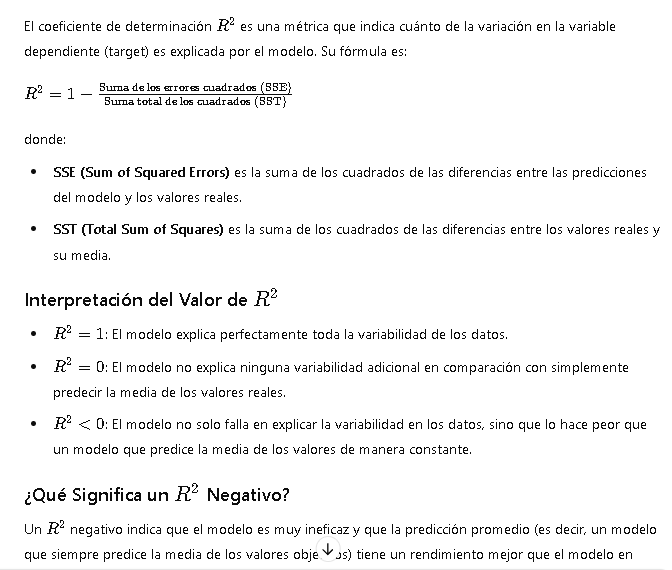

##### porque sera que es negativo ? cual es la razon ? 

sea lo que sea, no esta capturando bien la información de las demas variables por lo que data leaging o fuga de datos no es ya que si no me daria
metricas alticimas y me engañaria en cuanto a generalizacion 


---

#### ¿Por qué puede ser que el \( R^2 \) sea negativo?

Un \( R^2 \) negativo indica que el modelo no está capturando bien la relación entre las variables independientes y la variable dependiente. En otras palabras, las predicciones del modelo son peores que simplemente usar la media de la variable objetivo para todos los casos. Las razones para obtener un \( R^2 \) negativo pueden incluir:

1. **Modelo Deficiente:**
   - El modelo podría ser demasiado simple o inapropiado para el problema. Si el modelo no tiene suficiente capacidad para capturar la complejidad de los datos, es posible que no realice predicciones útiles.

2. **Errores en la Evaluación:**
   - Verifica que los datos de prueba y las predicciones se alineen correctamente. Asegúrate de que no haya errores en el cálculo del \( R^2 \) o en el proceso de evaluación.

3. **Datos No Representativos:**
   - Si los datos de prueba no son representativos del problema que se está resolviendo, el \( R^2 \) puede ser bajo. Esto puede ocurrir si hay una separación incorrecta entre los conjuntos de entrenamiento y prueba o si los datos tienen problemas de calidad.

4. **Fuga de Datos (Data Leakage):**
   - Aunque en este caso específico mencionas que la fuga de datos no parece ser el problema, es importante recordar que la fuga de datos generalmente tiende a hacer que las métricas sean artificialmente altas en lugar de bajas. Sin embargo, es crucial asegurarse de que no haya fuga de datos, ya que podría llevar a evaluaciones engañosas del rendimiento del modelo.

5. **Subajuste (Underfitting):**
   - Si el modelo es demasiado simple o no está suficientemente entrenado, puede no capturar las relaciones subyacentes en los datos.

### Conclusión

Un \( R^2 \) negativo sugiere que el modelo está fallando en capturar la relación entre las variables. Es importante revisar la calidad del modelo, la adecuación de los datos y el proceso de evaluación para entender y abordar el problema. 

---

Este enfoque proporciona una explicación más completa y precisa, y también aborda posibles causas y soluciones.